Join properties to DataFrames of the oc

In [1]:
using DataFrames , Statistics
using Query
using PyPlot
using TSne
using Printf

import CSV

## directory
rootdir = "/home/stephane/Science/GAIA"
wdir    = "$rootdir/products"

cd(wdir)

In [2]:
# import final sample and original one with ages, etc..

sample= rootdir*"/master/notebooks/data/BrowseTargets.18292.1530479692.fake"
df1= CSV.read(sample, delim= "|")
df1.name= strip.(df1.name)


finalsample=wdir*"/votlist.finalSample_metric0.01.csv"
df2= CSV.read(finalsample, delim= ";")

ndat= size(df2)

## UGLY dix for name with a "-" in it
name=[]
for vot in df2.votname
    t= split(vot,"-")
    if length(t) == 3
        t[1]= t[1]*"-"*t[2]
    end
    push!(name,t[1])
end

df2[:name]= name


df3= join(df1, df2, on = :name, makeunique= true)

i= 0
for na in df2.name
    i += 1
    if !(na in df1.name)
        println(na)
        println(i)
    end
end

dfselect= sort(df3[:, [:votname, :name,:log_age]], order(:votname))

CSV.write("votlist.finalSample_metric0.01-age.csv", dfselect, delim= ";")

"votlist.finalSample_metric0.01-age.csv"

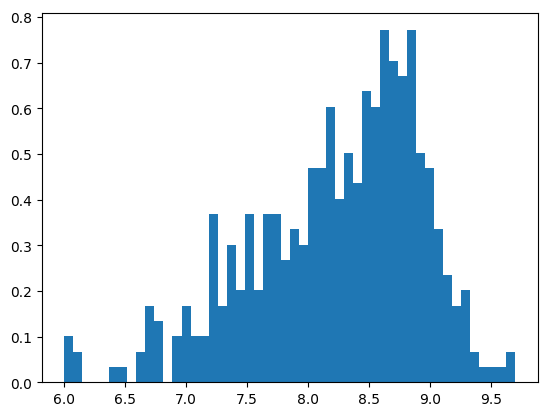

## Age distribution


In [7]:
PyPlot.hist(dfselect[:log_age], 50, density=true)
println("## Age distribution")